In [90]:
import csv
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import pickle

Tracking section

In [91]:
rows = []
file_name = 'RISLlab_Lidar_of_walking'
with open(file_name+'.csv', 'r') as file:
    csvreader = csv.reader(file)
    header = next(csvreader)
    for row in csvreader:
        rows.append(row)
print("test")

headers = np.array(header).T

test


In [92]:
translation_df = pd.DataFrame(np.array(rows[3::5]))
translation_df = translation_df.T.astype(float)
translation_df

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,4.294495,4.294495,4.294495,4.294495,4.294495,4.294495,4.294495,4.294495,4.294495,4.294495,...,4.294911,4.294911,4.294341,4.294341,4.294341,4.295062,4.295062,4.295062,4.295062,4.295062
1,-11.277810,-11.277810,-11.277810,-11.277810,-11.277810,-11.277810,-11.277810,-11.277810,-11.277810,-11.277810,...,-11.277755,-11.277755,-11.277927,-11.277927,-11.277927,-11.277595,-11.277595,-11.277595,-11.277595,-11.277595
2,0.282471,0.282471,0.282471,0.282471,0.282471,0.282471,0.282471,0.282471,0.282471,0.282471,...,0.278351,0.278351,0.279991,0.279991,0.279991,0.282734,0.282734,0.282734,0.282734,0.282734
3,0.017811,0.017811,0.017811,0.017811,0.017811,0.017811,0.017811,0.017811,0.017811,0.017811,...,0.018136,0.018136,0.017884,0.017884,0.017884,0.017525,0.017525,0.017525,0.017525,0.017525
4,0.008545,0.008545,0.008545,0.008545,0.008545,0.008545,0.008545,0.008545,0.008545,0.008545,...,0.008649,0.008649,0.008472,0.008472,0.008472,0.008247,0.008247,0.008247,0.008247,0.008247
5,0.891416,0.891416,0.891416,0.891416,0.891416,0.891416,0.891416,0.891416,0.891416,0.891416,...,0.891415,0.891415,0.891413,0.891413,0.891413,0.891440,0.891440,0.891440,0.891440,0.891440
6,0.452755,0.452755,0.452755,0.452755,0.452755,0.452755,0.452755,0.452755,0.452755,0.452755,...,0.452742,0.452742,0.452759,0.452759,0.452759,0.452725,0.452725,0.452725,0.452725,0.452725


In [93]:
# create a dataframe of the radian alphas
# create a lidar rho dataframe
rho_df = pd.DataFrame(np.array(rows[1::5]))
rho_df = rho_df.T
rho_df


,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,1.687999963760376,1.687999963760376,1.687999963760376,1.687999963760376,1.687999963760376,1.687999963760376,1.687999963760376,1.6859999895095825,1.6859999895095825,1.687999963760376,...,1.6859999895095825,1.690000057220459,1.690000057220459,1.687999963760376,1.690000057220459,1.690000057220459,1.684000015258789,1.6859999895095825,1.690000057220459,1.690000057220459
1,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,...,1.687999963760376,1.687999963760376,1.687999963760376,1.687999963760376,1.687999963760376,1.687999963760376,1.684000015258789,1.684000015258789,1.687999963760376,1.687999963760376
2,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,...,1.684000015258789,1.684000015258789,1.684000015258789,1.687999963760376,1.684000015258789,1.684000015258789,1.6859999895095825,1.6859999895095825,1.684000015258789,1.684000015258789
3,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,...,1.684000015258789,1.6820000410079956,1.684000015258789,1.6859999895095825,1.684000015258789,1.684000015258789,1.6859999895095825,1.6859999895095825,1.684000015258789,1.684000015258789
4,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,...,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,1.6920000314712524,1.6920000314712524,1.6920000314712524,1.6920000314712524,1.6920000314712524,1.6920000314712524,1.6920000314712524,1.6920000314712524,1.690000057220459,1.690000057220459,...,1.684000015258789,1.684000015258789,1.6859999895095825,1.684000015258789,1.684000015258789,1.684000015258789,1.6959999799728394,1.6959999799728394,1.687999963760376,1.687999963760376
1076,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,...,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.684000015258789,1.6859999895095825,1.6859999895095825,1.690000057220459,1.690000057220459,1.687999963760376,1.6859999895095825
1077,1.684000015258789,1.684000015258789,1.684000015258789,1.684000015258789,1.684000015258789,1.684000015258789,1.684000015258789,1.6799999475479126,1.6820000410079956,1.6820000410079956,...,1.6859999895095825,1.6859999895095825,1.687999963760376,1.6820000410079956,1.687999963760376,1.687999963760376,1.6820000410079956,1.6820000410079956,1.6859999895095825,1.687999963760376
1078,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.684000015258789,1.6859999895095825,1.6859999895095825,...,1.687999963760376,1.687999963760376,1.687999963760376,1.6859999895095825,1.687999963760376,1.687999963760376,1.6859999895095825,1.684000015258789,1.687999963760376,1.687999963760376


In [94]:

alpha_df = pd.DataFrame()

for i in range(rho_df.shape[1]):
    # Header_info.loc['angle_increment'][i] * np.arange(1, 1081)
    alpha_df[i] = Header_info.loc['angle_increment'][0] * np.arange(1, 1081) - math.pi/2
# alpha_df = alpha_df.transpose().drop(del_indexes, axis=1).transpose()
alpha_df[0]

C:\Users\ian.picklo\AppData\Local\Temp\ipykernel_14008\1035661258.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  alpha_df[i] = Header_info.loc['angle_increment'][0] * np.arange(1, 1081) - math.pi/2


0      -1.564989
1      -1.559182
2      -1.553375
3      -1.547568
4      -1.541761
          ...   
1075    4.677514
1076    4.683321
1077    4.689128
1078    4.694935
1079    4.700742
Name: 0, Length: 1080, dtype: float64

In [95]:
difference = rho_df[0].astype(float)-rho_df[20].astype(float)
indx = np.array(list(difference[difference.astype(float) <= 0.01].index))
print(len(rho_df))


1080


In [ ]:
def find_cont_leg(rho_df):
    longest = []
    lastest = []
    for i in range(1,len(rho_df)):
        if rho_df[i] - rho_df[i-1] < .05:
            lastest.append(i)
            if len(lastest)> longest:
                longest = lastest  
        else:
            lastest = []
        


[0.         0.00199601 0.00399202 0.00598802 0.00798403 0.00998004
 0.01197605 0.01397206 0.01596806 0.01796407 0.01996008 0.02195609
 0.0239521  0.0259481  0.02794411 0.02994012 0.03193613 0.03393214
 0.03592814 0.03792415 0.03992016 0.04191617 0.04391218 0.04590818
 0.04790419 0.0499002  0.05189621 0.05389222 0.05588822 0.05788423
 0.05988024 0.06187625 0.06387226 0.06586826 0.06786427 0.06986028
 0.07185629 0.0738523  0.0758483  0.07784431 0.07984032 0.08183633
 0.08383234 0.08582834 0.08782435 0.08982036 0.09181637 0.09381238
 0.09580838 0.09780439 0.0998004  0.10179641 0.10379242 0.10578842
 0.10778443 0.10978044 0.11177645 0.11377246 0.11576846 0.11776447
 0.11976048 0.12175649 0.1237525  0.1257485  0.12774451 0.12974052
 0.13173653 0.13373253 0.13572854 0.13772455 0.13972056 0.14171657
 0.14371257 0.14570858 0.14770459 0.1497006  0.15169661 0.15369261
 0.15568862 0.15768463 0.15968064 0.16167665 0.16367265 0.16566866
 0.16766467 0.16966068 0.17165669 0.17365269 0.1756487  0.1776

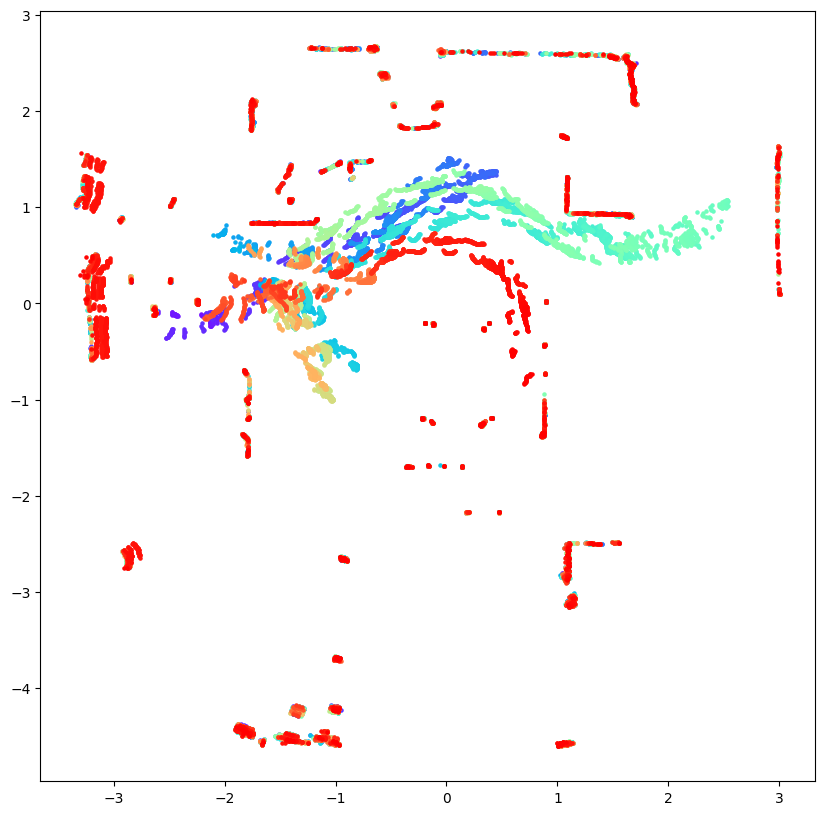

In [130]:
def pol2cart(rho, phi):
        x = rho * np.cos(phi)
        y = rho * np.sin(phi)
        return(x, y)
color = []
for i in range(501):
        
    color.append(i/501)
color = np.array(color)

colors = plt.cm.rainbow(np.linspace(0, 1, 501))
print(color)
plt.figure(figsize=(10, 10))
start =  pd.DataFrame(pol2cart(rho_df[0].astype(float), alpha_df[0].astype(float)), ['X', 'Y']).T
# plt.scatter(start['X'], start['Y'], s=1,color = 'black')
for i in range(10,501):
    difference = rho_df[i-10].astype(float)-rho_df[i].astype(float)
    indx = np.array(list(difference[difference.astype(float) <= 0.01].index))       
    cartesian_df = pd.DataFrame(pol2cart(rho_df[i].astype(float), alpha_df[i].astype(float)), ['X', 'Y'])
    cartesian_df = cartesian_df.drop(indx, axis=1).T

    
    
    plt.scatter(cartesian_df['X'], cartesian_df['Y'], s=5,color =colors[i])
plt.show()
